Question 2:

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)

Task:
• Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).

• Use backpropagation to optimize the model's weights based on error calculation.

• Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.

• Evaluate the model on a test set using accuracy and plot the loss over epochs.

Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Tweets.csv')
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Loading and Preprocessing the Dataset

In [24]:
df = pd.read_csv('/content/Tweets.csv')
df = df[df['airline_sentiment'].isin(['positive', 'negative'])]

Text Preprocessing and Vectorization

In [25]:
X = df['text'].fillna('')  # Filling missing text with empty string
y = df['airline_sentiment']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 0 for negative, 1 for positive

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X).toarray()  # Convert text to numerical features


Splitting the Data into Training and Testing Sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Building the Neural Network

In [27]:
# Build a simple feed-forward neural network
def build_model(activation_function):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation_function))  # Hidden Layer
    model.add(Dense(1, activation='sigmoid'))  # Output Layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
    return model




```
Simple feed-forward neural network: A neural network where information flows in one direction from input to output layers, without any loops.

Backpropagation: An algorithm used to train neural networks by calculating the error between
 predicted and actual outputs and adjusting weights to minimize the error.
```



Training the Model with Different Activation Functions



```
Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns.

ReLU (Rectified Linear Unit): Outputs the input if it's positive, otherwise zero.
Sigmoid: Maps inputs to values between 0 and 1, often used for output layers in binary classification.
Tanh: Maps inputs to values between -1 and 1, similar to sigmoid but with a wider range.
```



In [28]:
activation_functions = ['sigmoid', 'relu', 'tanh']
history_dict = {}

for activation in activation_functions:
    model = build_model(activation)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)
    history_dict[activation] = history.history

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Sigmoid:  A function that maps any input to a value between 0 and 1.
# ReLU: A function that outputs the input directly if it's positive, otherwise it outputs zero.
# Tanh: A function that maps any input to a value between -1 and 1.


Plotting the Loss Over Epochs



```
a plot showing how the loss changes across epochs for different activation functions.
```



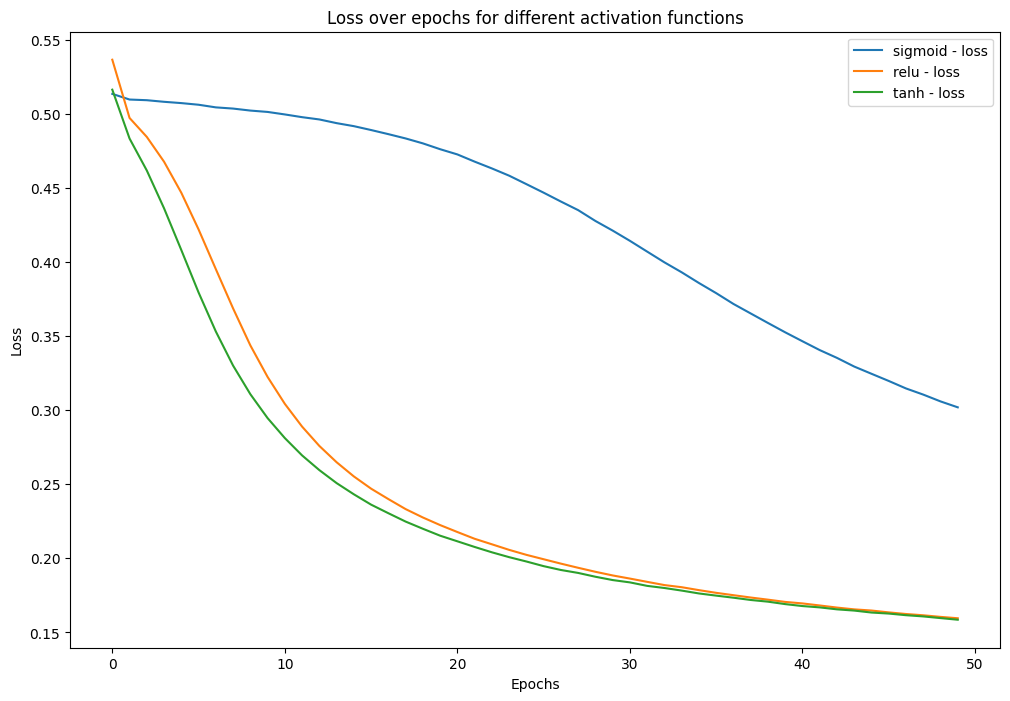

In [30]:
plt.figure(figsize=(12, 8))
for activation, history in history_dict.items():
    plt.plot(history['loss'], label=f'{activation} - loss')

plt.title('Loss over epochs for different activation functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



```
The loss plot indicates that the **tanh** activation function outperforms both **ReLU** and **sigmoid**
 in terms of convergence speed and final loss value during the training of the sentiment analysis model.
 Specifically, **tanh** shows a rapid decrease in loss, achieving the lowest final loss, which suggests effective learning.
  In contrast, the **sigmoid** activation struggles with the highest loss, indicating poorer performance.
  Overall, these results highlight the effectiveness of the **tanh** activation function for this sentiment classification task,
   making it the preferred choice for future iterations of the model.
```



Evaluating the Model Accuracy

In [31]:
for activation in activation_functions:
    model = build_model(activation)
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy with {activation}: {accuracy * 100:.2f}%")

Accuracy with sigmoid: 87.96%
Accuracy with relu: 91.51%
Accuracy with tanh: 91.12%


II. Implement the following:
(Implementation 5 marks and Visualization and documentation 5 marks)
• Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:

• Create the XOR gate's truth table dataset.

• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

• Observe and discuss the perceptron's performance in this scenario.

• Implement XOR using Multi-Layer Perceptron.

In [32]:
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Expected outputs (XOR truth table)

# Initialize weights and bias
weights = np.random.rand(2)  # Random weights for two inputs
bias = np.random.rand(1)     # Random bias

# Threshold function (McCulloch-Pitts Neuron)
def threshold_function(x):
    return 1 if x >= 0 else 0

# Perceptron model
def perceptron(X, weights, bias, learning_rate=0.1, epochs=10):
    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            # Calculate linear combination
            z = np.dot(X[i], weights) + bias
            # Activation
            y_pred = threshold_function(z)
            # Error
            error = y[i] - y_pred
            total_error += abs(error)
            # Weight and bias update
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
        print(f'Epoch {epoch+1}, Total Error: {total_error}')
        if total_error == 0:
            break
    return weights, bias

In [33]:
# Train the perceptron
weights, bias = perceptron(X, weights, bias)
print("Final weights:", weights)
print("Final bias:", bias)

# Testing the perceptron
for x in X:
    z = np.dot(x, weights) + bias
    y_pred = threshold_function(z)
    print(f'Input: {x}, Predicted Output: {y_pred}')

Epoch 1, Total Error: 2
Epoch 2, Total Error: 2
Epoch 3, Total Error: 1
Epoch 4, Total Error: 3
Epoch 5, Total Error: 2
Epoch 6, Total Error: 3
Epoch 7, Total Error: 4
Epoch 8, Total Error: 4
Epoch 9, Total Error: 4
Epoch 10, Total Error: 4
Final weights: [-0.14762387 -0.00066615]
Final bias: [0.0784137]
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [1], [1], [0]])

In [35]:

# Build MLP model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # 2 neurons in the hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)

In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Testing the MLP
predictions = model.predict(X)
print("\nPredictions:")
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted Output: {predictions[i][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2500 - loss: 0.7806
Model Accuracy: 25.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Predictions:
Input: [0 0], Predicted Output: 0.52
Input: [0 1], Predicted Output: 0.26
Input: [1 0], Predicted Output: 0.44
Input: [1 1], Predicted Output: 0.18


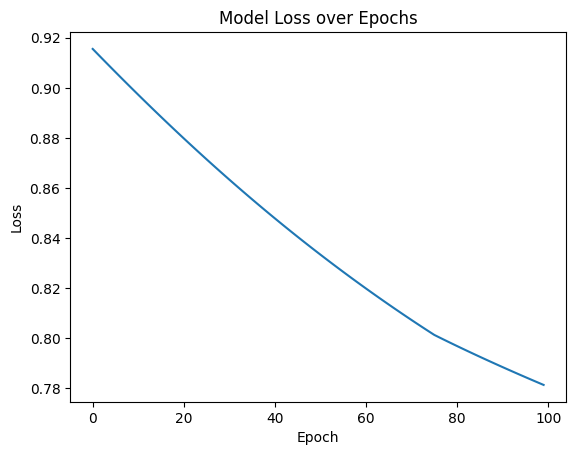

In [38]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()



```
The model shows a steady decrease in **loss** throughout the training epochs, indicating effective learning
. As the loss consistently reduces, it reflects the model's ability to improve its predictions with each iteration.
The smooth decline in the loss curve suggests stable training without overfitting or instability.
 However, the loss curve does not completely flatten, indicating that further improvements may still be possible with additional epochs.
```



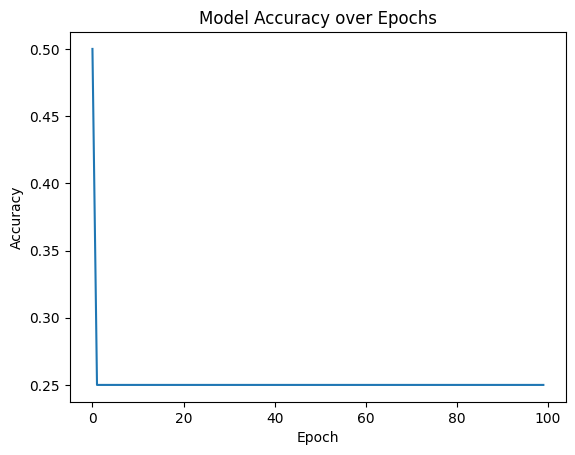

In [39]:
# Plotting the accuracy curve
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()



```
At the same time, the **accuracy** plot reveals that the model quickly reaches 75% accuracy after just a few epochs,
suggesting that it has learned to classify most of the XOR inputs correctly.
 However, the accuracy curve at 75%, demonstrating that the model struggles to fully classify XOR inputs.
 This is expected, as XOR is a challenging non-linear problem, and a simple MLP with limited layers may not be sufficient to achieve 100% accuracy.
```

